In [3]:
import numpy
import pandas as pd
import geopandas
import pysal
import seaborn
import contextily
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

https://geographicdata.science/book/notebooks/08_point_pattern_analysis.html

In [4]:
db = pd.read_pickle("../data/manipulated/data_final.pkl")

In [5]:
#maping the damage grade numerically
mapping = {
    "Damaged": 3,
    "Destroyed": 4,
    "No visible damage": 1,
    "Possibly damaged": 2
}

db['damage_gra'] = db['damage_gra'].replace(mapping)


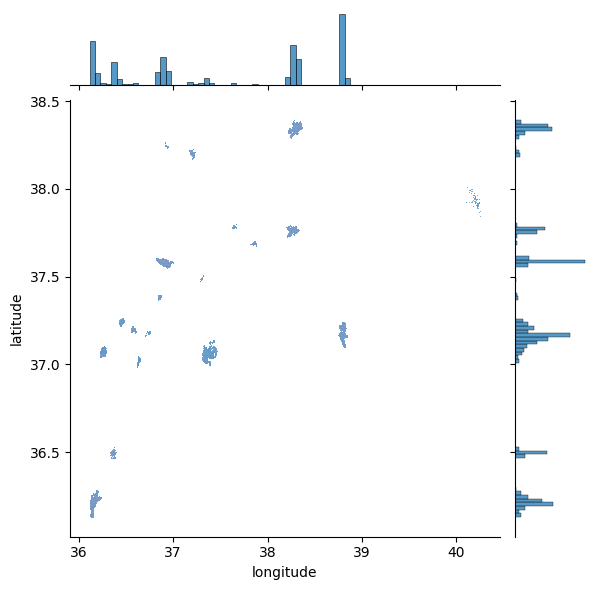

In [7]:
# Generate scatter plot
seaborn.jointplot(x="longitude", y="latitude", data=db, s=0.5);

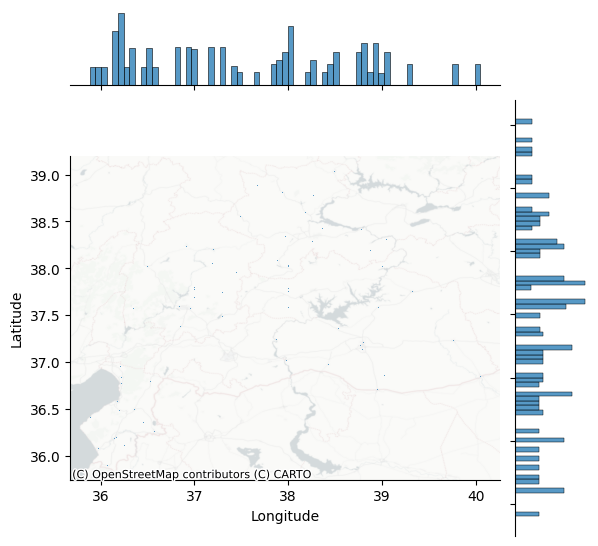

In [8]:
# Generate scatter plot
joint_axes = seaborn.jointplot(
    x="Longitude", y="Latitude", data=db, s=0.5
)
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels,
);

/home/lapita/anaconda3/envs/tfm/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 25 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


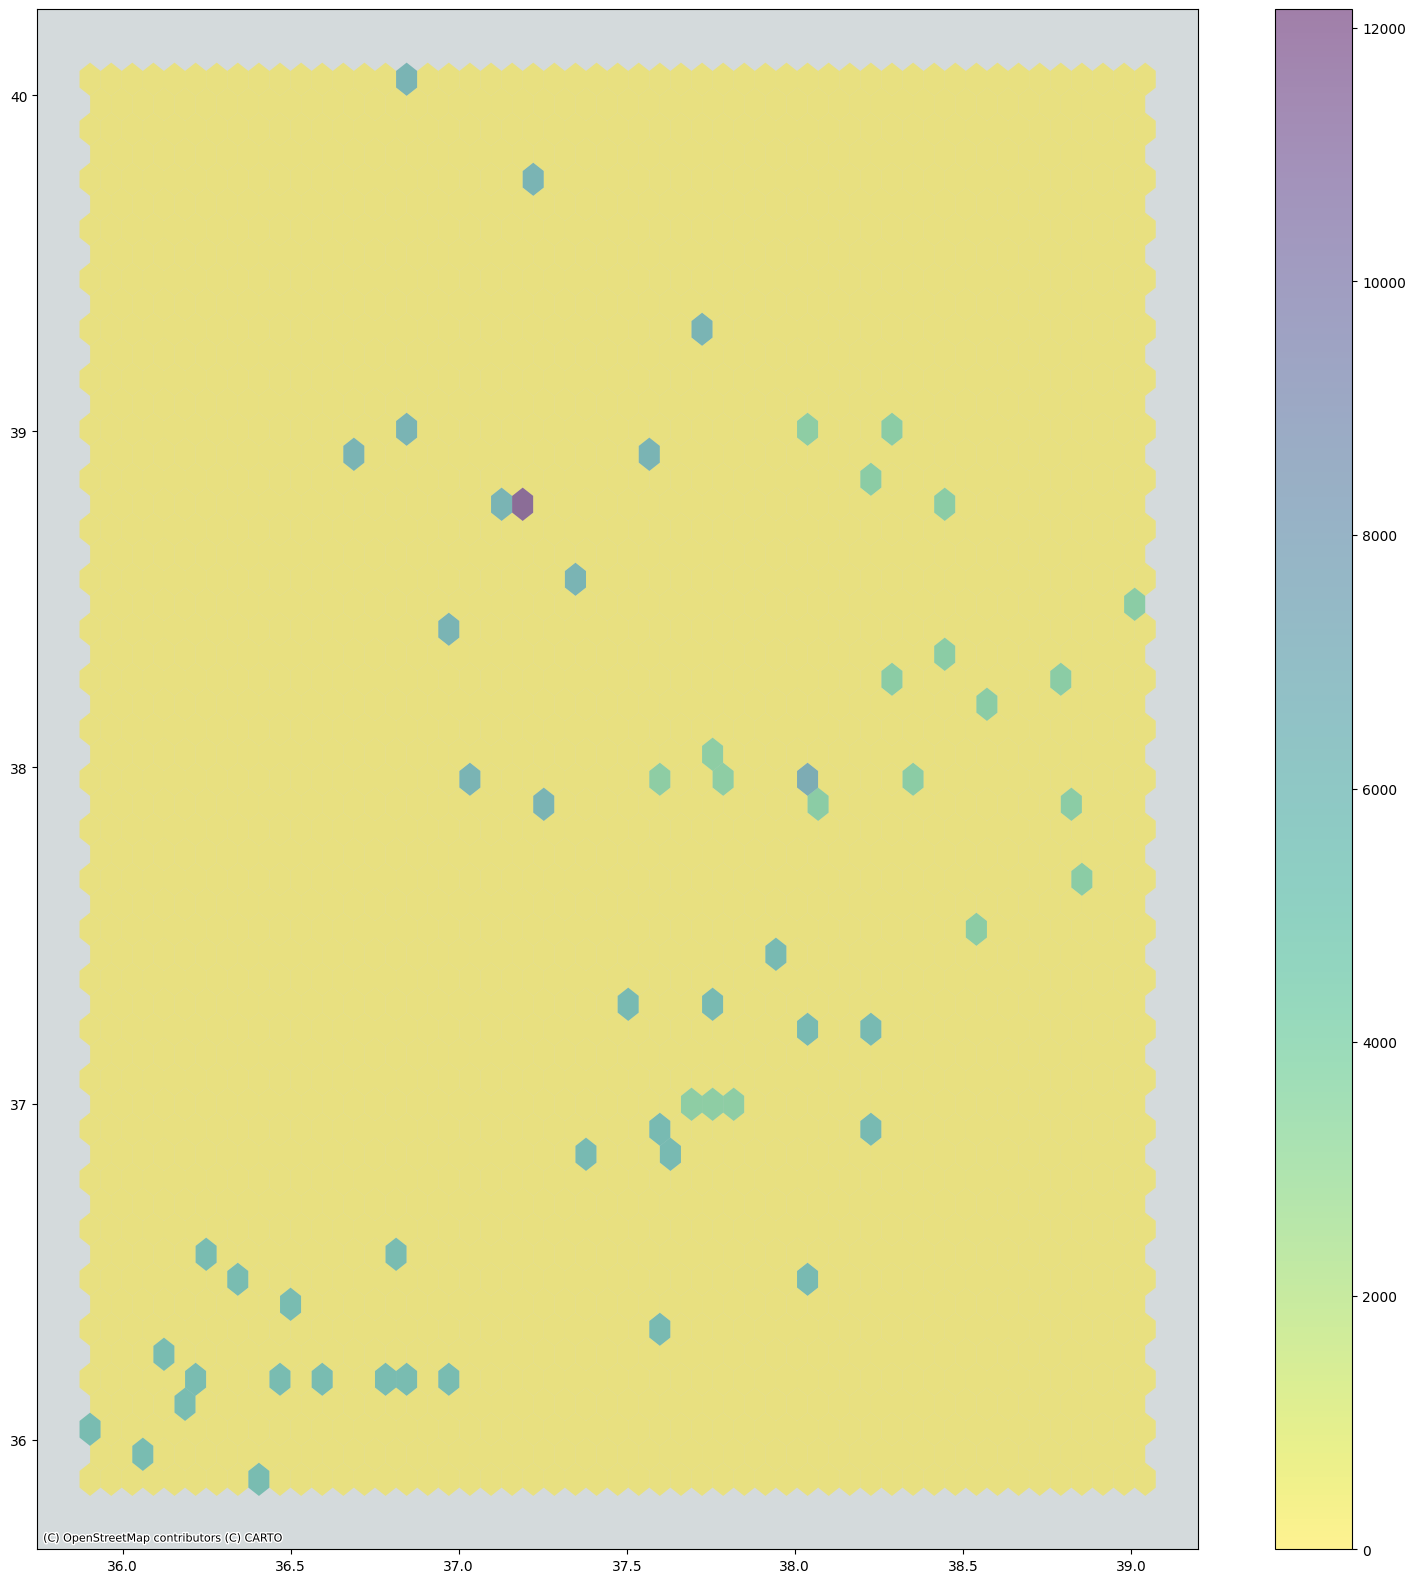

In [9]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(20, 20))
# Generate and add hexbin with 50 hexagons in each
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    db["Latitude"],
    db["Longitude"],
    gridsize=50,
    linewidths=0,
    alpha=0.5,
    cmap="viridis_r",
)
# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
# Add colorbar
plt.colorbar(hb)


/tmp/ipykernel_6342/467781876.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  seaborn.kdeplot(
/home/lapita/anaconda3/envs/tfm/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 25 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


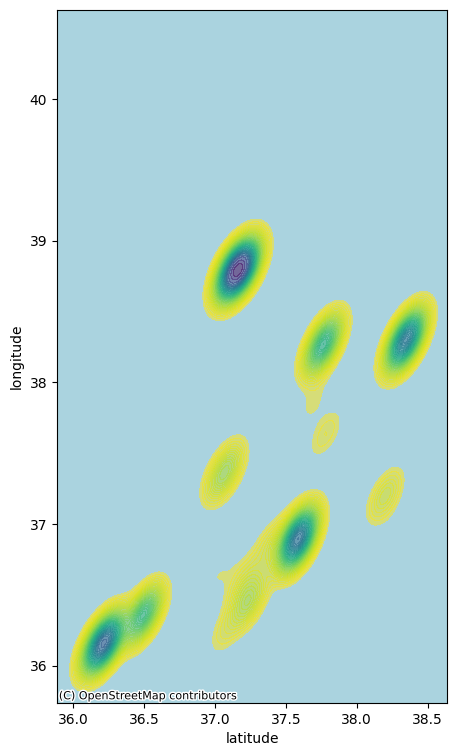

In [11]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    x="latitude",
    y="longitude",
    data=db,
    n_levels=50,
    shade=True,
    alpha=0.55,
    cmap="viridis_r",
)
# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.OpenStreetMap.Mapnik
)


In [15]:
from pointpats import centrography

In [12]:
mean_center = centrography.mean_center(db[["latitude", "longitude"]])
med_center = centrography.euclidean_median(db[["latitude", "longitude"]])




NameError: name 'centrography' is not defined

/home/lapita/anaconda3/envs/tfm/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


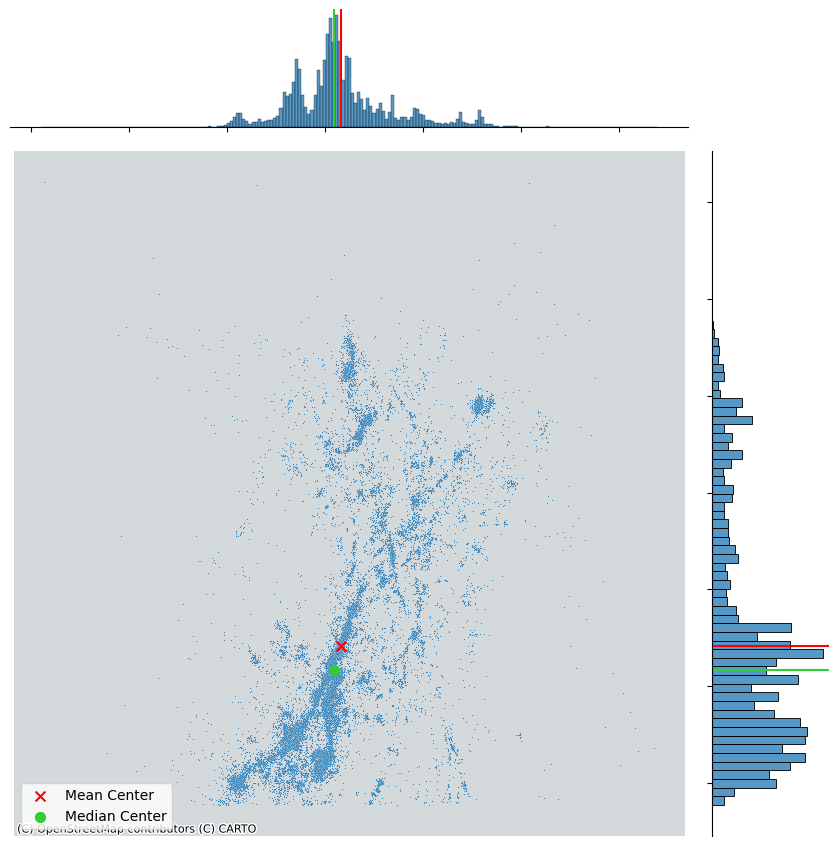

In [ ]:
# Generate scatterplot
joint_axes = seaborn.jointplot(
    x="latitude", y="longitude", data=db, s=0.75, height=9
)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(
    *mean_center, color="red", marker="x", s=50, label="Mean Center"
)
joint_axes.ax_marg_x.axvline(mean_center[0], color="red")
joint_axes.ax_marg_y.axhline(mean_center[1], color="red")
# Add median point and marginal lines
joint_axes.ax_joint.scatter(
    *med_center,
    color="limegreen",
    marker="o",
    s=50,
    label="Median Center"
)
joint_axes.ax_marg_x.axvline(med_center[0], color="limegreen")
joint_axes.ax_marg_y.axhline(med_center[1], color="limegreen")
# Legend
joint_axes.ax_joint.legend()
# Add basemap
contextily.add_basemap(
    joint_axes.ax_joint, source=contextily.providers.CartoDB.Positron
)
# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()

In [18]:
a = centrography.std_distance(db[["latitude", "longitude"]])

a

2.616821842766752

In [20]:
major, minor, rotation = centrography.ellipse(db[["latitude", "longitude"]])

/home/lapita/anaconda3/envs/tfm/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


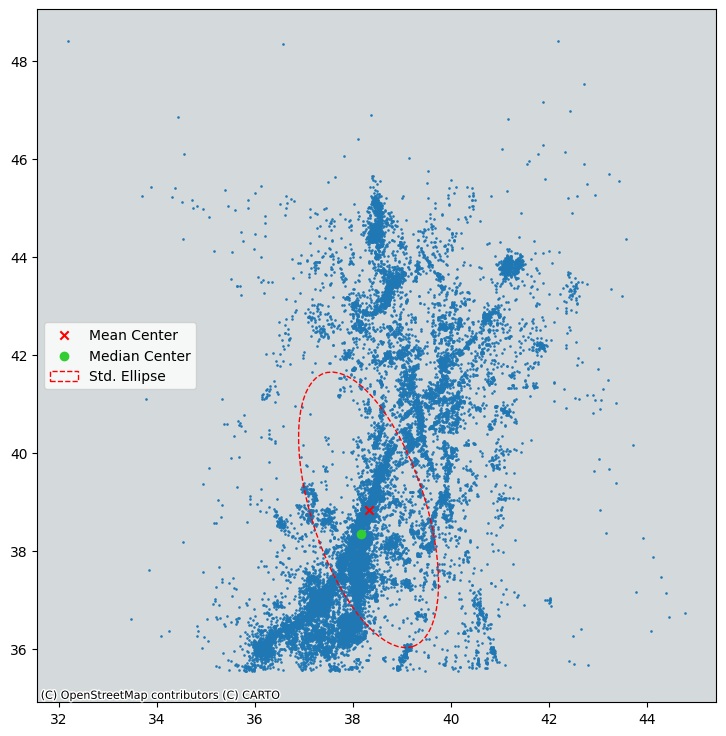

In [21]:
from matplotlib.patches import Ellipse

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot photograph points
ax.scatter(db["latitude"], db["longitude"], s=0.75)
ax.scatter(*mean_center, color="red", marker="x", label="Mean Center")
ax.scatter(
    *med_center, color="limegreen", marker="o", label="Median Center"
)

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(
    xy=mean_center,  # center the ellipse on our mean center
    width=major * 2,  # centrography.ellipse only gives half the axis
    height=minor * 2,
    angle=numpy.rad2deg(
        rotation
    ),  # Angles for this are in degrees, not radians
    facecolor="none",
    edgecolor="red",
    linestyle="--",
    label="Std. Ellipse",
)
ax.add_patch(ellipse)

ax.legend()
# Display
# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
plt.show()

In [22]:

#taking only the destroyed buildings
user = db.query('Magnitude > 6')
coordinates = user[["Latitude", "Longitude"]].values

In [23]:
convex_hull_vertices = centrography.hull(coordinates)

In [24]:
import libpysal

alpha_shape, alpha, circs = libpysal.cg.alpha_shape_auto(
    coordinates, return_circles=True
)

/home/lapita/anaconda3/envs/tfm/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 25 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)
/tmp/ipykernel_6503/2069727279.py:53: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend();


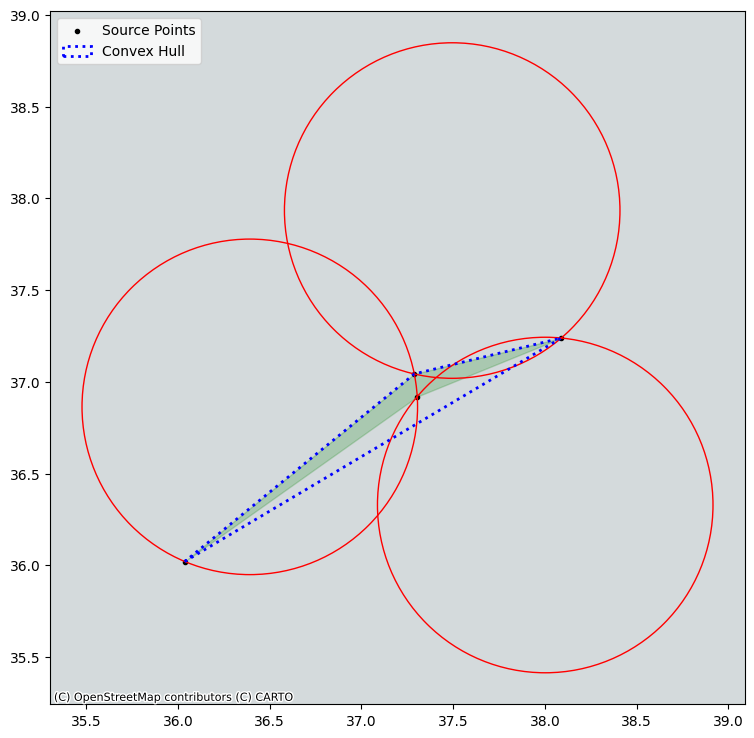

In [25]:
f, ax = plt.subplots(1, 1, figsize=(9, 9))

# Plot a green alpha shape
geopandas.GeoSeries(
    [alpha_shape]
).plot(
    ax=ax,
    edgecolor="green",
    facecolor="green",
    alpha=0.2,
    label="Tightest single alpha shape",
)

# Include the points for our prolific user in black
ax.scatter(
    *coordinates.T, color="k", marker=".", label="Source Points"
)

# plot the circles forming the boundary of the alpha shape
for i, circle in enumerate(circs):
    # only label the first circle of its kind
    if i == 0:
        label = "Bounding Circles"
    else:
        label = None
        ax.add_patch(
            plt.Circle(
                circle,
                radius=alpha,
                facecolor="none",
                edgecolor="r",
                label=label,
            )
        )
        
# add a blue convex hull
ax.add_patch(
    plt.Polygon(
        convex_hull_vertices,
        closed=True,
        edgecolor="blue",
        facecolor="none",
        linestyle=":",
        linewidth=2,
        label="Convex Hull",
    )
)

# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
plt.legend();
